In [9]:
if False:
    import debugpy
    
    # Try to listen on the port, catch exception if already listening
    try:
        debugpy.listen(("localhost", 5678))
        print("Debugpy is listening on localhost:5678")
    except RuntimeError as e:
        print(f"Debugpy is already listening: {e}")

Input tensor shape: torch.Size([2, 10, 256])
No Latent KV cache
No RoPE K cache
Visualizing RoPE K vector pairs


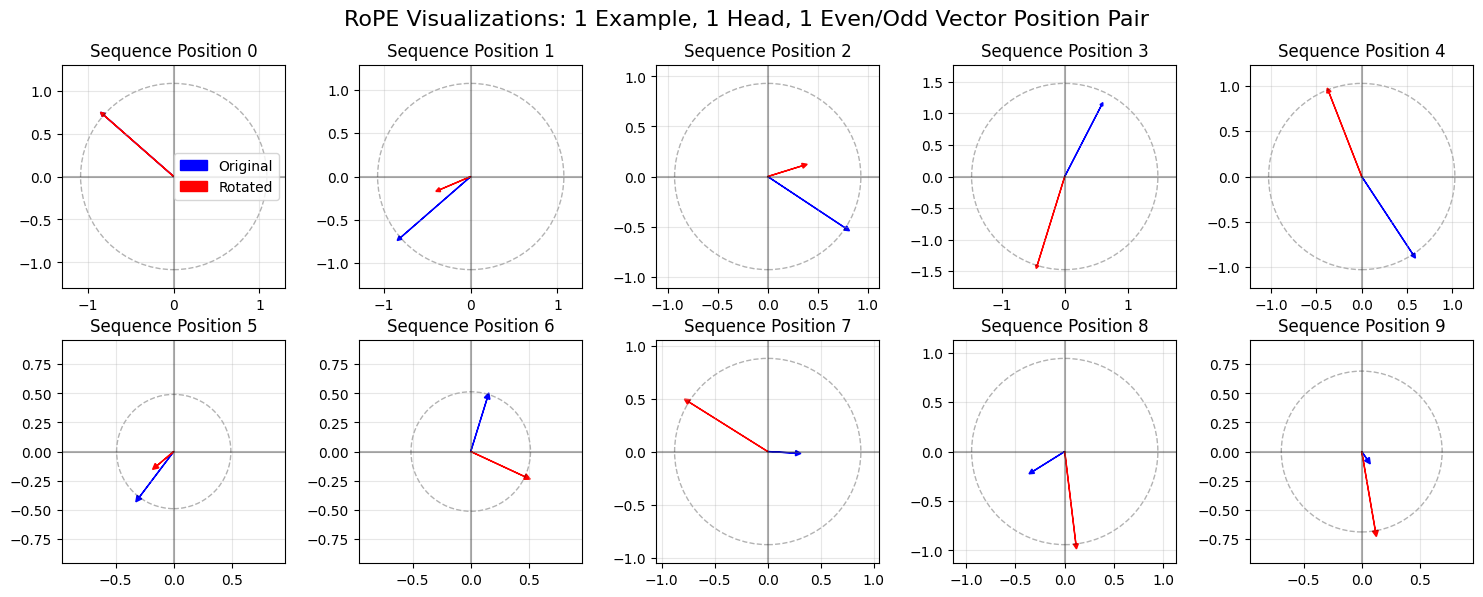

Visualizing RoPE Q vector pairs


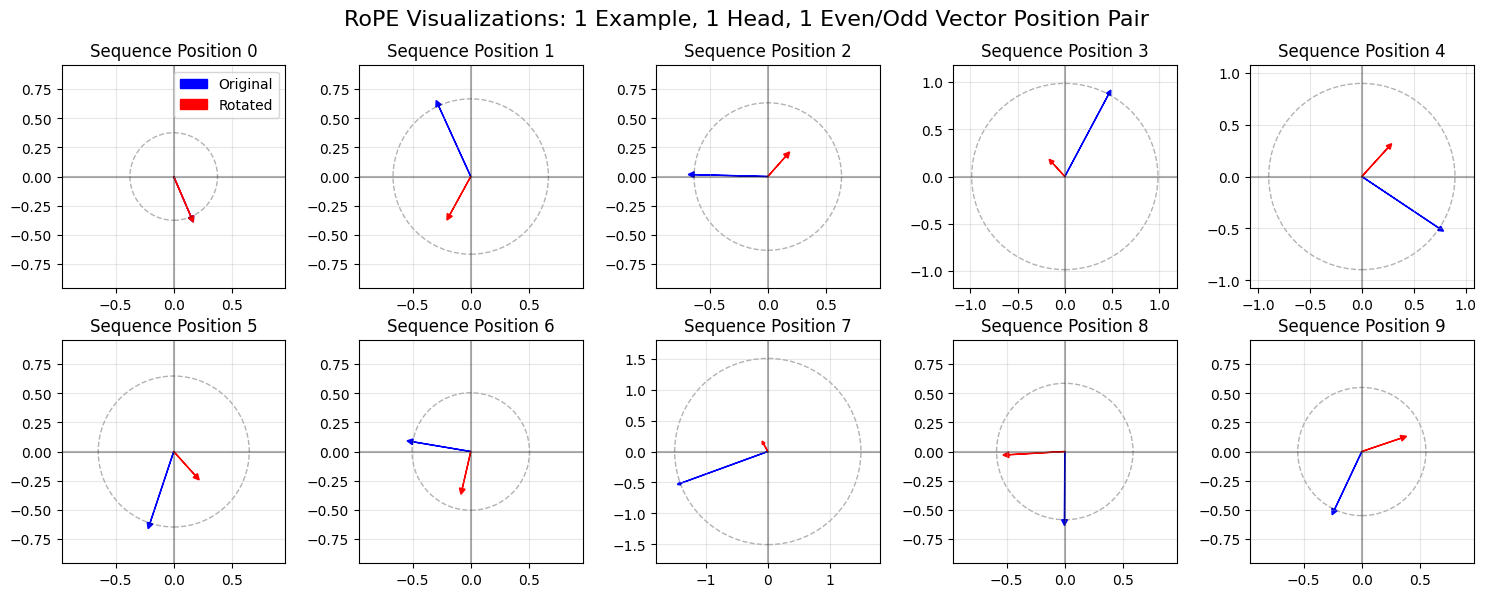

out.shape torch.Size([2, 10, 256]) latent_kv_cache.shape torch.Size([2, 10, 16]) kr_cache.shape torch.Size([2, 10, 256])


In [10]:
import torch
from mla_attention import MLAConfig, MultiHeadLatentAttention

# Setup example parameters
batch_size = 2
seq_len = 10

# Create an instance of the model
config = MLAConfig()
model = MultiHeadLatentAttention(config)

# Create a random input tensor using the config dimensions
x = torch.randn(batch_size, seq_len, config.dim)
print(f"Input tensor shape: {x.shape}")  # Should be [2, 10, 256] with default config

out, latent_kv_cache, kr_cache = model(x)
print("out.shape", out.shape,
    "latent_kv_cache.shape", latent_kv_cache.shape, "kr_cache.shape", kr_cache.shape)

Latent KV cache torch.Size([2, 10, 16])
RoPE K cache torch.Size([2, 10, 256])
Visualizing RoPE K vector pairs


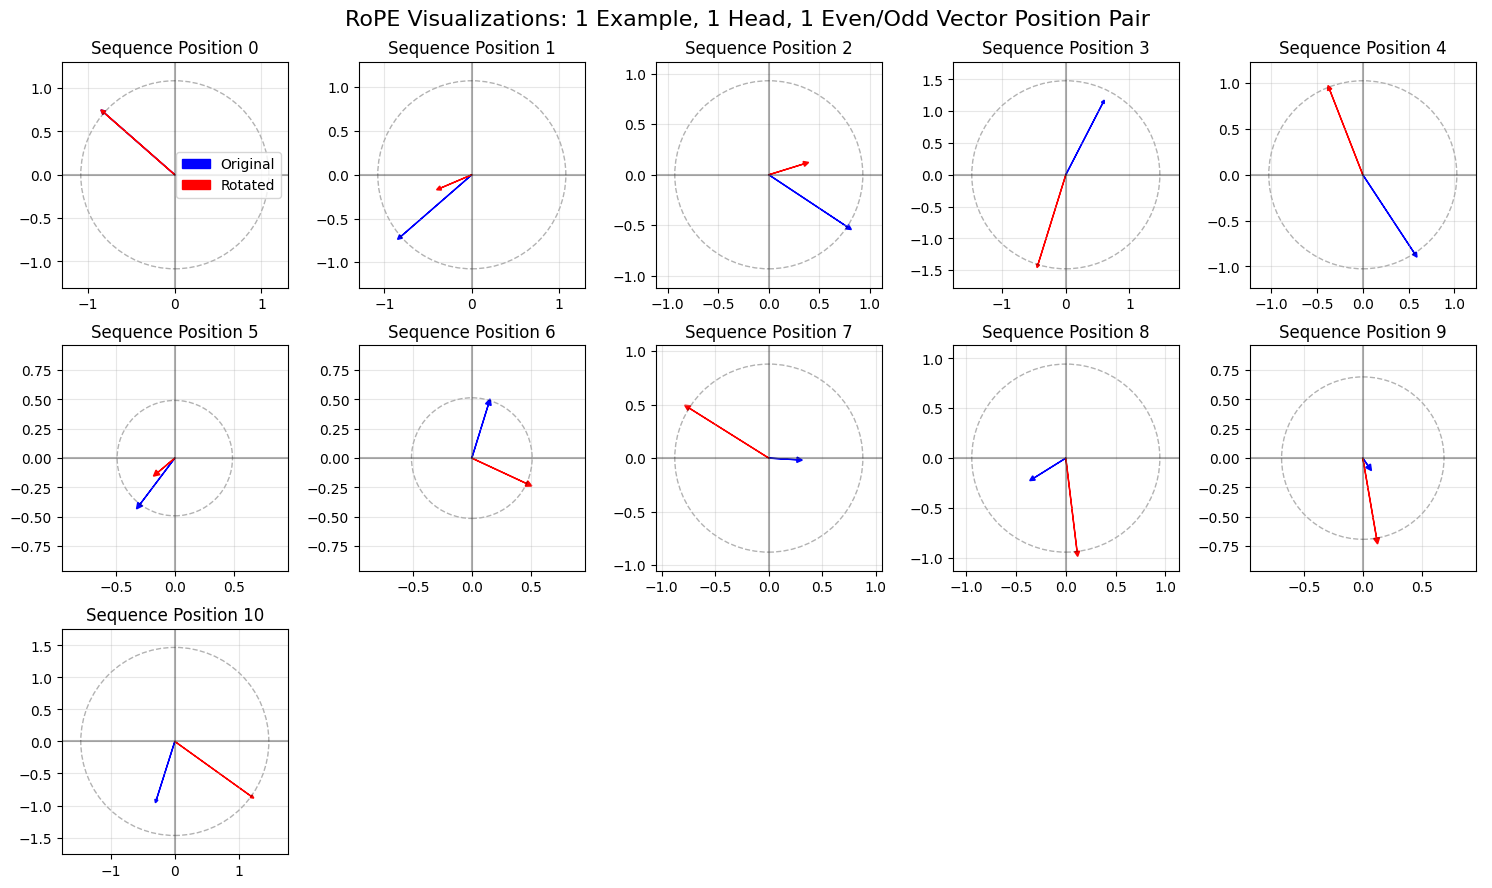

Visualizing RoPE Q vector pairs


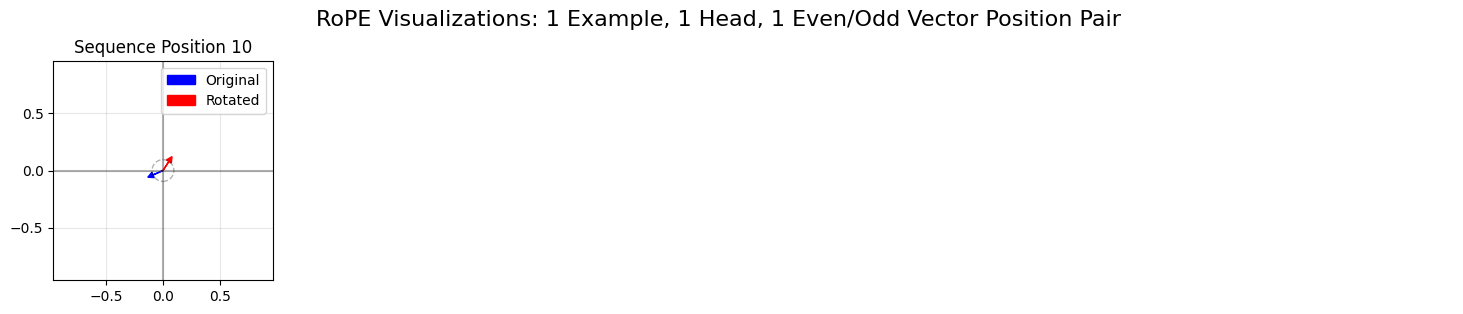

out.shape torch.Size([2, 1, 256]) latent_kv_cache.shape torch.Size([2, 11, 16]) kr_cache.shape torch.Size([2, 11, 256])


In [11]:
new_x = torch.randn(batch_size, 1, config.dim)
out, latent_kv_cache, kr_cache = model(new_x, latent_kv_cache, kr_cache)
print("out.shape", out.shape,
    "latent_kv_cache.shape", latent_kv_cache.shape, "kr_cache.shape", kr_cache.shape)